In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv("time_series_19-covid-Confirmed.csv")
df.loc[df['Country/Region']=='US'].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
33,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,9,14,21,31,51,58,71,83,83,116
34,"Cook County, IL",US,41.7377,-87.6976,0,0,1,1,1,1,...,3,4,4,4,5,5,6,7,7,11
40,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,1,1,...,1,1,1,7,11,13,14,14,14,20
56,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
59,"San Diego County, CA",US,32.7157,-117.1611,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3


In [26]:
dates = list(df.columns)[4:len(df.columns)]
dat = {
    'US' : [],
    'WORLD' : [],
    'Date' : []
}

for d in dates:
    mon,day,yr = d.split('/')
    datetim = dt.datetime(2020, int(mon), int(day))
    dat['US'].append(sum(df.loc[df['Country/Region']=='US'][d]))
    dat['WORLD'].append(sum(df[d]))
    dat['Date'].append(datetim)

covid = pd.DataFrame.from_dict(dat)

In [33]:
# Fidelity ETF Sectors
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020,3,10)
#end = dt.datetime.now()

etfs = ['FDIS','FSTA','FCOM','FIDU','FENY','FNCL','FHLC','FTEC','FMAT','FUTY','FREL']
labs = ['Consumer Discretionary','Staples','Communication','Industrial','Energy','Finance','Healthcare','Tech','Materials','Utilities','Real Estate']

def adj_close_percent(df,col='Adj Close'):
    per=[]
    for i,e in df.iterrows():
        if i == 0 : 
            per.append(0)
            continue
        las = df.iloc[i-1][col]
        now = e[col]
        delta = now-las
        per.append((now-df.iloc[0][col])/df.iloc[0][col])
    df['PerChg']=np.array(per)*100
    return df

etf=pd.DataFrame()
for e,l in zip(etfs,labs):
    d = web.DataReader(e, 'yahoo', start, end)
    d['Ticker']=e
    d['Label']='{} {}'.format(e,l)
    d['Date'] = d.index.map(lambda x:x.date())
    d.reset_index(inplace=True,drop=True)
    etf = pd.concat([etf,adj_close_percent(d)])
etf.head()

,High,Low,Open,Close,Volume,Adj Close,Ticker,Label,Date,PerChg
0,48.849998,48.410000,48.610001,48.849998,243000.0,48.849998,FDIS,FDIS Consumer Discretionary,2020-01-02,0.000000
1,48.619999,48.200001,48.259998,48.520000,106700.0,48.520000,FDIS,FDIS Consumer Discretionary,2020-01-03,-0.675533
2,48.669998,48.139999,48.139999,48.669998,564100.0,48.669998,FDIS,FDIS Consumer Discretionary,2020-01-06,-0.368476
3,48.730000,48.459999,48.669998,48.630001,234000.0,48.630001,FDIS,FDIS Consumer Discretionary,2020-01-07,-0.450353
4,49.049999,48.599998,48.630001,48.820000,49200.0,48.820000,FDIS,FDIS Consumer Discretionary,2020-01-08,-0.061410


In [30]:
covid = adj_close_percent(covid,'US')
covid['US_PerChg']=covid['PerChg']
covid = adj_close_percent(covid,'WORLD')
covid['WORLD_PerChg']=covid['PerChg']
covid.head()

,US,WORLD,Date,PerChg,US_PerChg,WORLD_PerChg
0,1,555,2020-01-22,0.000000,0.0,0.000000
1,1,653,2020-01-23,17.657658,0.0,17.657658
2,2,941,2020-01-24,69.549550,100.0,69.549550
3,2,1434,2020-01-25,158.378378,100.0,158.378378
4,5,2118,2020-01-26,281.621622,400.0,281.621622


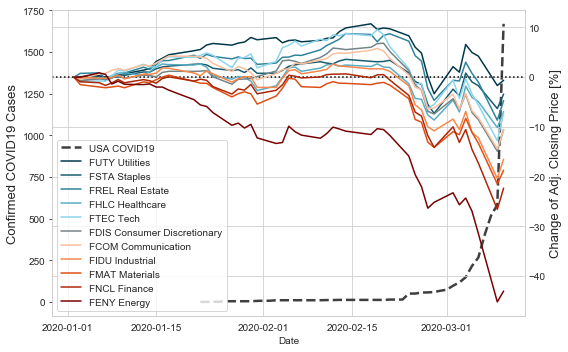

In [137]:
pal = ['#00374a', '#155c70', '#2d8499', '#59acc2', '#8ad5ec', '#738386', '#fbbf9c', '#f7864a', '#dd4e14', '#ad2505', '#780000']

xtix = [dt.datetime(2020, 1, 1),dt.datetime(2020, 1, 15),
        dt.datetime(2020, 2, 1),dt.datetime(2020, 2, 15),
        dt.datetime(2020, 3, 1)]
xtix = [x.date() for x in xtix]

sns.set_style("whitegrid")
f,ax = plt.subplots(1,1,figsize=(8,5))


sns.lineplot(
    y='US',
    x='Date',
    data=covid,
    ax=ax,
    color='#3f3f3f',
    linewidth=2.5,
    label='USA COVID19',
    legend=False,
    dashes=True
)
ax.lines[0].set_linestyle("--")

ax2 = plt.twinx()
ax2.set_xticks(xtix,)
ax2.set_xticklabels(xtix,rotation=30)


sns.lineplot(
    y='PerChg',
    x='Date',
    data=etf,
    hue_order=etf.loc[etf['Date']==end.date()].sort_values(by=['PerChg'],ascending=False)['Label'].values,
    hue='Label',
    ax=ax2,
    palette=pal,

)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
del lines2[0]
del labels2[0]
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax2.tick_params(axis='both', which='both', length=0)
ax.yaxis.grid(False)
xmin,xmax= ax.set_xlim()
ax.set_ylabel("Confirmed COVID19 Cases",fontsize=13)
ax2.hlines(xmin=xmin,xmax=xmax,y=0,linestyle=':')
ax2.set_ylabel("Change of Adj. Closing Price [%]",fontsize=13)
#sns.despine(ax=ax2)
#sns.despine(ax=ax)
f.tight_layout()
f.savefig("usacovid19_economy.png",dpi=150)

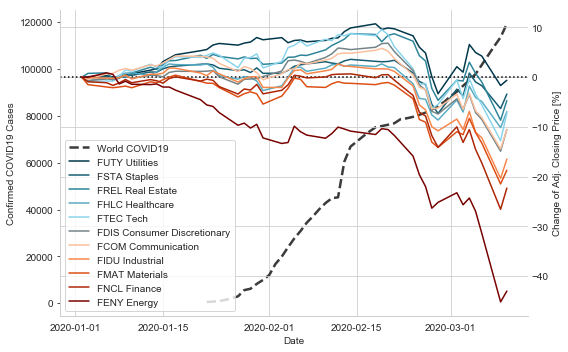

In [130]:
pal = ['#00374a', '#155c70', '#2d8499', '#59acc2', '#8ad5ec', '#738386', '#fbbf9c', '#f7864a', '#dd4e14', '#ad2505', '#780000']

xtix = [dt.datetime(2020, 1, 1),dt.datetime(2020, 1, 15),
        dt.datetime(2020, 2, 1),dt.datetime(2020, 2, 15),
        dt.datetime(2020, 3, 1)]
xtix = [x.date() for x in xtix]

sns.set_style("whitegrid")
f,ax = plt.subplots(1,1,figsize=(8,5))


sns.lineplot(
    y='WORLD',
    x='Date',
    data=covid,
    ax=ax,
    color='#3b3b3b',
    linewidth=2.5,
    label='World COVID19',
    legend=False,
    dashes=True
)
ax.lines[0].set_linestyle("--")

ax2 = plt.twinx()
ax2.set_xticks(xtix,)
ax2.set_xticklabels(xtix,rotation=30)


sns.lineplot(
    y='PerChg',
    x='Date',
    data=etf,
    hue_order=etf.loc[etf['Date']==end.date()].sort_values(by=['PerChg'],ascending=False)['Label'].values,
    hue='Label',
    ax=ax2,
    palette=pal,

)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
del lines2[0]
del labels2[0]
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax2.tick_params(axis='both', which='both', length=0)

ax.yaxis.grid(False)
xmin,xmax= ax.set_xlim()
ax.set_ylabel("Confirmed COVID19 Cases")
ax2.hlines(xmin=xmin,xmax=xmax,y=0,linestyle=':')
ax2.set_ylabel("Change of Adj. Closing Price [%]")
sns.despine(ax=ax2)
sns.despine(ax=ax)
f.tight_layout()
f.savefig("worldcovid19_economy.png",dpi=150)